In [3]:
import numpy as np
import random as Random
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_excel(r"E:\My work\Sem 7\ML\ML-Class\End Sem\End sem Data.xlsx")
data = df.to_numpy()
np.random.shuffle(data)
Y = data[:,-1]
X = np.delete(data,-1,1)
X = X.astype(np.float64)
Y = Y.astype(np.float64)
#Separating into train/test (80-20)
sep = 0.8*len(X)-1
sep = int(sep)
trainx, testx = X[:sep,:], X[sep:,:]
trainy, testy = Y[:sep], Y[sep:]

In [10]:
# GD from scratch
def GD_Batch(x,y, epochs = 10**4, α = 10**(-8)):
    w0 = np.ones((len(x),1))
    x = np.hstack((w0,x))
    wc = np.array([0]*len(x[0]))
    n = len(x)
    for epoch in range(epochs):
        yp = np.dot(x,wc)

        #Reshaping y to allow for multiplication
        yp = yp.reshape(len(yp),1)
        y = y.reshape(len(y),1)
        ws = (x*(y-yp)).sum(axis=0)
        wd = -(2/n)*ws
        wc = wc-(α*wd)
        #print("m {}, b {}, iteration {}".format(mc,bc,i))
    return(wc)

def SGD(x,y, iter = 800, α = 10**(-8)):
    w0 = np.ones((len(x),1))
    x = np.hstack((w0,x))
    wc = np.array([0]*len(x[0]))
    wc = np.transpose(wc)
    n = len(x)
    for i in range(iter):
        ya = np.random.choice(y)
        xa = x[np.where(y == ya)]
        #if(i == 1): print(xa.shape,wc.shape)
        yp = np.dot(xa,np.transpose(wc))
        #if(i == 0): print(ya-yp,xa)
        ws1 = (ya-yp)
        if(i == 0): print(ws1[0])
        ws = np.multiply(ws1[0],xa)
        #if(i == 0): print(ws)
        wd = -2*ws
        wc = wc-(α*wd)
        #print("m {}, b {}, iteration {}".format(mc,bc,i))
    return(wc)
    
    
# Mini Batch GD (mini batch size 20)
def minBatchGD(x,y, iter = 800, α = 10**(-8)):
    w0 = np.ones((len(x),1))
    x = np.hstack((w0,x))
    wc = np.array([0]*len(x[0]))
    n = len(x)
    bs = 3
    for i in range(iter):
        ya = Random.sample(y,k = bs)
        xa = np.zeros(bs)
        for j in range(bs):
            xa[j] = x[np.where(y == ya[j])]
        yp = np.dot(xa,wc)

        #Reshaping y to allow for multiplication
        yp = yp.reshape(len(yp),1)
        ya = ya.reshape(len(ya),1)
        
        ws = (x*(y-yp)).sum(axis=0)
        wd = -(2/bs)*ws
        wc = wc-(α*wd)
        #print("m {}, b {}, iteration {}".format(mc,bc,i))
    return(wc)

In [11]:
# Applying linear regression
model = LinearRegression()
res = model.fit(trainx, trainy)


predy = res.predict(testx)
w1 = GD_Batch(trainx,trainy)
w2 = GD_Batch(trainx,trainy,10**5)
w3 = GD_Batch(trainx,trainy,10**6)

In [12]:
# The coefficients
print("Coefficients: \n", model.coef_)
print(w1)
print(w2)
print(w3)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(testy, predy))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(testy, predy))

Coefficients: 
 [-1.30367360e-03 -4.34443813e-01 -3.46011871e+01  9.79667626e-02
 -1.43255810e+02]
[1.21297332e-02 1.45537072e-02 9.66975674e-02 1.62533418e-03
 5.80234877e-01 1.60621520e-04]
[5.62565207e-02 1.45745070e-03 3.97046927e-01 7.50783410e-03
 2.06627446e+00 6.67439857e-04]
[2.35929749e-01 8.63955081e-04 9.39199913e-01 3.27096197e-02
 2.08022278e+00 1.66795393e-03]
Mean squared error: 24.23
Coefficient of determination: 0.52


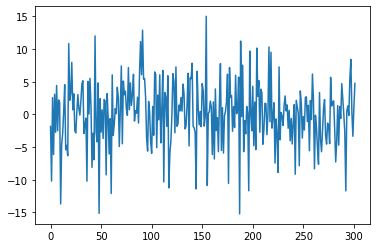

In [8]:
acc = predy-testy
l = len(predy)
plt.plot(np.arange(l), acc)
plt.show()